In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score,accuracy_score,log_loss
from sklearn.model_selection import train_test_split,StratifiedKFold , GridSearchCV
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
cancer = pd.read_csv('BreastCancer.csv').set_index('Code')


In [4]:
X = cancer.drop('Class',axis=1)
y = cancer['Class']

In [5]:
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=24,test_size=0.3,stratify=y)

In [6]:
rf = RandomForestClassifier(n_estimators=10,random_state=24)

In [7]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=24)

In [8]:
y_pred = rf.predict(X_test)

In [9]:
print(accuracy_score(y_test,y_pred))

0.9666666666666667


In [10]:
y_pred_prob = rf.predict_proba(X_test)[:,1]

In [13]:
print(roc_auc_score(y_test,y_pred_prob))

0.9938607085346216


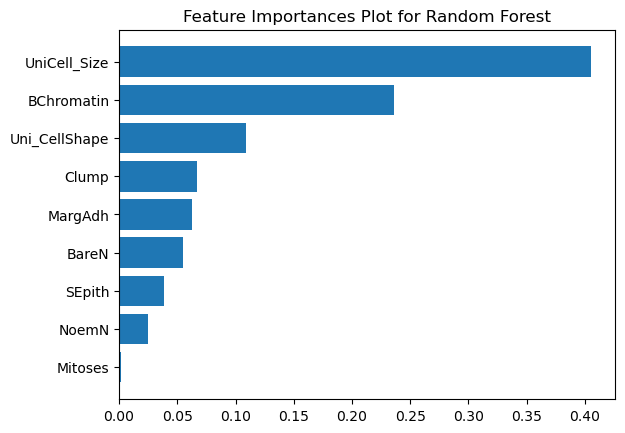

In [14]:
dtc= DecisionTreeClassifier(random_state=24)
dtc.fit(X_train,y_train)
df_imp= pd.DataFrame({'feature':list(X.columns),
               'importance':rf.feature_importances_})
df_imp.sort_values('importance', inplace=True)
plt.barh(df_imp['feature'], df_imp['importance'])
plt.title("Feature Importances Plot for Random Forest")
plt.show()